# Rain Reports
Initial Development

In [1]:
%load_ext autoreload
%autoreload 2

from pathlib import Path

import geopandas as gpd
import contextily as cx

from raindownloader.inpe import INPE
from raindownloader.inpedownloader import INPEDownloader
from raindownloader.utils import FileType
from rainreporter.reporter import RainReporter

In [112]:
import os

In [ ]:
os.path.

In [2]:
reporter = RainReporter(server=INPE.FTPurl, root=INPE.DailyMERGEroot)

In [111]:
rain = reporter.accum_rain(    
    start_date='20230101', 
    end_date='20230105', 
    download_folder='../tmp',
)

file ..\tmp\MERGE_CPTEC_20230101.grib2 already exists.
file ..\tmp\MERGE_CPTEC_20230102.grib2 already exists.
file ..\tmp\MERGE_CPTEC_20230103.grib2 already exists.
file ..\tmp\MERGE_CPTEC_20230104.grib2 already exists.
file ..\tmp\MERGE_CPTEC_20230105.grib2 already exists.


d:\Programs\miniconda3\envs\geopandas38\lib\site-packages\ecmwflibs\__init__.py:83: UserWarning: DLL load failed while importing _ecmwflibs: The specified procedure could not be found.
  warnings.warn(str(e))
C:\Users\Mauricio\AppData\Roaming\Python\Python38\site-packages\xarray\backends\plugins.py:71: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


In [4]:
rain

<xarray.Dataset>
Dimensions:      (x: 1001, y: 924)
Coordinates:
    band         int32 1
  * x            (x) float64 -120.1 -120.0 -119.9 ... -20.25 -20.15 -20.05
  * y            (y) float64 -60.05 -59.95 -59.85 -59.75 ... 32.05 32.15 32.25
    spatial_ref  int32 0
Data variables:
    band_data    (y, x) float32 2.25 3.375 3.5 5.125 ... 2.625 2.0 1.5 1.625

## Opening Basins of Interest

In [5]:
import os
from pathlib import Path
os.environ['PROJ_LIB']

'd:\\Programs\\miniconda3\\envs\\geopandas38\\lib\\site-packages\\ecmwflibs\\share\\proj'

In [6]:
os.environ['PROJ_LIB'] = Path("d:/programs/miniconda3/envs/geopandas38/lib/site-packages/pyproj/proj_dir/share/proj/").as_posix()

In [13]:
import pyproj
pyproj.datadir.get_data_dir()

'd:\\Programs\\miniconda3\\envs\\geopandas38\\lib\\site-packages\\pyproj\\proj_dir\\share\\proj'

In [17]:
pyproj.datadir.get_data_dir?

Signature: pyproj.datadir.get_data_dir() -> str
Docstring:
The order of preference for the data directory is:

1. The one set by pyproj.datadir.set_data_dir (if exists & valid)
2. The internal proj directory (if exists & valid)
3. The directory in PROJ_LIB (if exists & valid)
4. The directory on sys.prefix (if exists & valid)
5. The directory on the PATH (if exists & valid)

Returns
-------
str:
    The valid data directory.
File:      d:\programs\miniconda3\envs\geopandas38\lib\site-packages\pyproj\datadir.py
Type:      function


In [16]:
pyproj

<module 'pyproj' from 'd:\\Programs\\miniconda3\\envs\\geopandas38\\lib\\site-packages\\pyproj\\__init__.py'>

In [14]:
pyproj.__version__

'2.6.1.post1'

In [15]:
from pyproj import Transformer
transformer = Transformer.from_crs("EPSG:4326", "EPSG:3857")
transformer.transform(12, 12)

CRSError: Invalid projection: EPSG:4326: (Internal Proj Error: proj_create: SQLite error on SELECT name, type, coordinate_system_auth_name, coordinate_system_code, datum_auth_name, datum_code, area_of_use_auth_name, area_of_use_code, text_definition, deprecated FROM geodetic_crs WHERE auth_name = ? AND code = ?: no such column: area_of_use_auth_name)

In [7]:

# os.environ['PROJ_LIB'] = 'D:/Programs/miniconda3/envs/geopandas38/Library/share/proj'
os.environ['PROJ_LIB']

'd:/programs/miniconda3/envs/geopandas38/lib/site-packages/pyproj/proj_dir/share/proj'

In [8]:
onedrive = Path('D:/OneDrive - Agência Nacional de Águas')
assert onedrive.exists()

shapes = onedrive/'Trabalho/SOE/COVEC/Bases/bacias de interesse SOE'
assert shapes.exists()

In [9]:
proj_path = Path(os.environ['PROJ_LIB'])
(proj_path/'proj.db').exists()

True

In [11]:
import rasterio as rio
rio.crs.CRS.from_epsg('4674')

CRSError: The EPSG code is unknown. PROJ: proj_create_from_database: SQLite error on SELECT name, type, coordinate_system_auth_name, coordinate_system_code, datum_auth_name, datum_code, area_of_use_auth_name, area_of_use_code, text_definition, deprecated FROM geodetic_crs WHERE auth_name = ? AND code = ?: no such column: area_of_use_auth_name

In [ ]:
import rasterio as rio

In [ ]:
rio.crs.CRS.from_epsg(4326)

CRS.from_epsg(4326)

In [12]:
import geopandas as gpd
doce = gpd.read_file(shapes/'bacia_Doce_wgs84.shp')


CRSError: Invalid projection: epsg:4326: (Internal Proj Error: proj_create: SQLite error on SELECT name, type, coordinate_system_auth_name, coordinate_system_code, datum_auth_name, datum_code, area_of_use_auth_name, area_of_use_code, text_definition, deprecated FROM geodetic_crs WHERE auth_name = ? AND code = ?: no such column: area_of_use_auth_name)

In [ ]:
doce.to_crs(rain.rio.crs, inplace=True)
ax = doce.plot()
cx.add_basemap(ax, source='../tmp/MERGE_CPTEC_20230101.tif')


## Using a Sentinel2 file to see performance issues

In [7]:
import rasterio as rio
tif_file = '/Users/cordmaur/Projects/data/images/S2B_MSIL2A_20220924T133149_N0400_R081_T22KEV_20220924T173829/T22KEV_20220924T133149_B03_10m.jp2'
dataset = rio.open(tif_file)

In [8]:
parana = gpd.read_file(shapes/'bacia_Parana.shp')
parana = parana.to_crs(dataset.crs)

<Axes: >

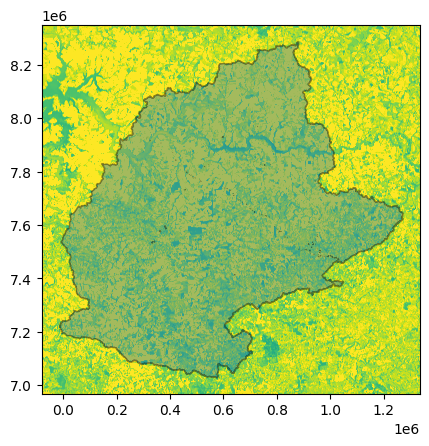

In [9]:
ax = parana.plot(alpha=0.4, edgecolor='k')
cx.add_basemap(source=tif_file, ax=ax, reset_extent=True, crs=dataset.crs, vmin=0, vmax=2000)
ax

## Option1: Testing time with MemoryFile

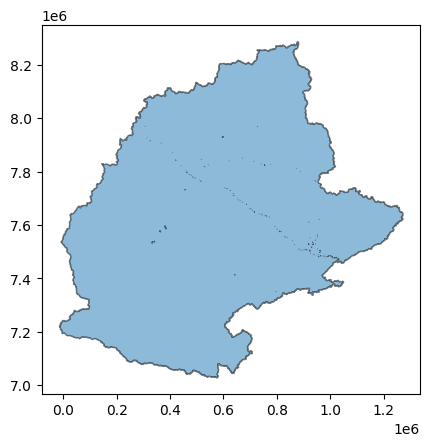

In [10]:
parana = parana.to_crs(dataset.crs)
ax = parana.plot(alpha=0.5, edgecolor='k')

In [70]:
# %%timeit
# open a geotiff file from disk
tif_file2 = '../tmp/MERGE_CPTEC_20230101.tif'
tif_file3 = '/Users/cordmaur/Projects/data/images/S2B_MSIL2A_20220924T133149_N0400_R081_T22KEV_20220924T173829/S2B_MSIL2A_20220924T133149_N0400_R081_T22KEV_20220924T173829_invalid_mask.tif'
tif_file4 = '/Users/cordmaur/Downloads/sentinel2.tif'
dataset = rio.open(tif_file4)

In [86]:
%%timeit

# open a geotiff file from disk
dataset = rio.open(tif_file4)

# create a memory file and use it to create a memory dataset
with rio.MemoryFile() as memfile:
    with memfile.open(**dataset.profile) as memdset:

        # write the data to the newly created dataset
        memdset.write(dataset.read())
        crs = dataset.crs
    
    # with the dataset in memory, add the basemap
    cx.add_basemap(ax, source=memfile, reset_extent=True, crs=crs, vmin=0, vmax=2000)

1.31 s ± 91.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


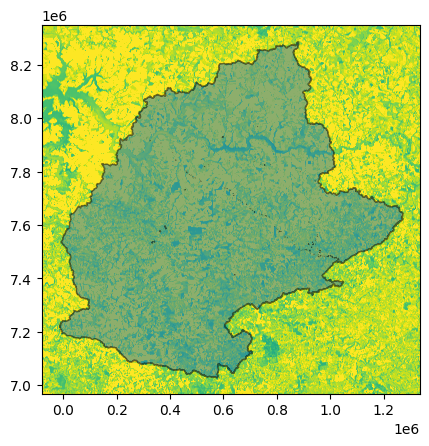

In [79]:
ax.figure

## Option 2: Saving to disk

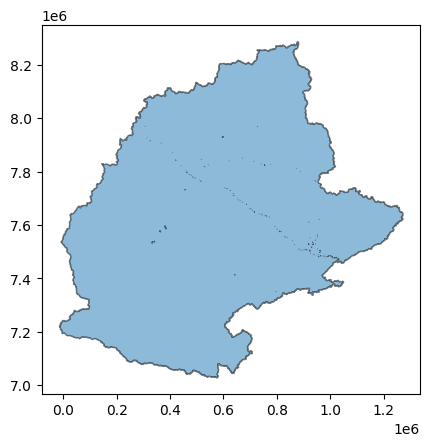

In [80]:
parana = parana.to_crs(dataset.crs)
ax = parana.plot(alpha=0.5, edgecolor='k')

In [81]:
# %%timeit
# open a geotiff file from disk
tif_file2 = '../tmp/MERGE_CPTEC_20230101.tif'
tif_file3 = '/Users/cordmaur/Projects/data/images/S2B_MSIL2A_20220924T133149_N0400_R081_T22KEV_20220924T173829/S2B_MSIL2A_20220924T133149_N0400_R081_T22KEV_20220924T173829_invalid_mask.tif'
tif_file4 = '/Users/cordmaur/Downloads/sentinel2.tif'
dataset = rio.open(tif_file4)

In [84]:
%%timeit
# open a geotiff file from disk
dataset = rio.open(tif_file4)

# get a tempfile
tmpfile = '../tmp/test.tif'

# create a new geotiff file
with rio.open(tmpfile, 'w', **dataset.profile) as dst:
    # write the data from the input dataset to the output dataset
    dst.write(dataset.read())

dataset.close()


cx.add_basemap(ax, source=tmpfile, reset_extent=True, crs=crs, vmin=0, vmax=2000)

# delete the file
Path(tmpfile).unlink()


1.77 s ± 231 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


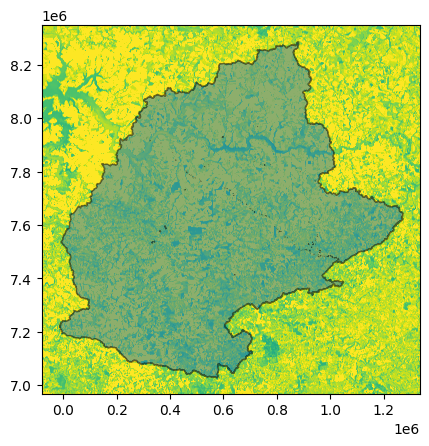

In [85]:
ax.figure

## Option 3: Using TempFile

In [103]:
import tempfile

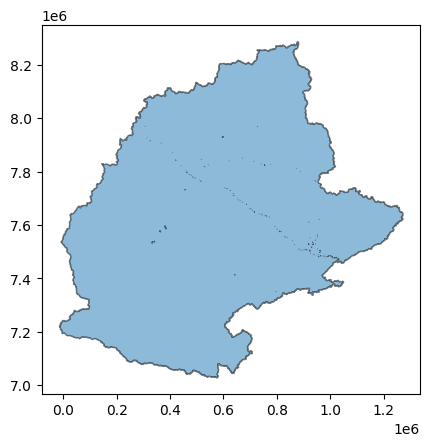

In [104]:
parana = parana.to_crs(dataset.crs)
ax = parana.plot(alpha=0.5, edgecolor='k')

In [105]:
# %%timeit
# open a geotiff file from disk
tif_file2 = '../tmp/MERGE_CPTEC_20230101.tif'
tif_file3 = '/Users/cordmaur/Projects/data/images/S2B_MSIL2A_20220924T133149_N0400_R081_T22KEV_20220924T173829/S2B_MSIL2A_20220924T133149_N0400_R081_T22KEV_20220924T173829_invalid_mask.tif'
tif_file4 = '/Users/cordmaur/Downloads/sentinel2.tif'


In [107]:
%%timeit
# open a geotiff file from disk
dataset = rio.open(tif_file4)

# get a tempfile
tmpfile = tempfile.NamedTemporaryFile(suffix='.tif')

# create a new geotiff file
with rio.open(tmpfile.name, 'w', **dataset.profile) as dst:
    # write the data from the input dataset to the output dataset
    dst.write(dataset.read())

dataset.close()

cx.add_basemap(ax, source=tmpfile.name, reset_extent=True, crs=crs, vmin=0, vmax=2000)

1.56 s ± 54.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


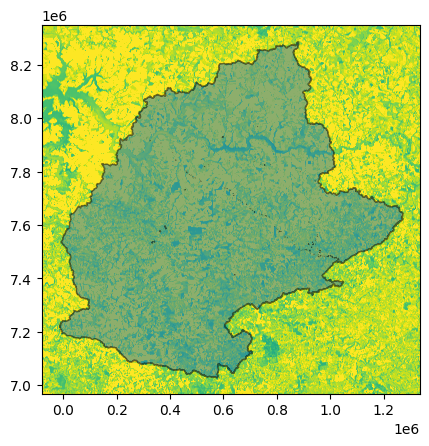

In [108]:
ax.figure

In [72]:
memfile = rio.MemoryFile()
memdset = memfile.open(**dataset.profile)
memdset.write(dataset.read())

In [73]:
memdset.read().shape

(1, 10980, 10980)

In [74]:
memfile.seek(0)

0

In [75]:
memfile.read()

b'II*\x00\x08\x00\x00\x00\x10\x00\x00\x01\x03\x00\x01\x00\x00\x00\xe4*\x00\x00\x01\x01\x03\x00\x01\x00\x00\x00\xe4*\x00\x00\x02\x01\x03\x00\x01\x00\x00\x00\x10\x00\x00\x00\x03\x01\x03\x00\x01\x00\x00\x00\x01\x00\x00\x00\x06\x01\x03\x00\x01\x00\x00\x00\x01\x00\x00\x00\x15\x01\x03\x00\x01\x00\x00\x00\x01\x00\x00\x00\x1c\x01\x03\x00\x01\x00\x00\x00\x02\x00\x00\x00B\x01\x03\x00\x01\x00\x00\x00\x00\x04\x00\x00C\x01\x03\x00\x01\x00\x00\x00\x00\x04\x00\x00D\x01\x04\x00y\x00\x00\x00\xb2\x02\x00\x00E\x01\x04\x00y\x00\x00\x00\xce\x00\x00\x00S\x01\x03\x00\x01\x00\x00\x00\x01\x00\x00\x00\x0e\x83\x0c\x00\x03\x00\x00\x00\x96\x04\x00\x00\x82\x84\x0c\x00\x06\x00\x00\x00\xae\x04\x00\x00\xaf\x87\x03\x00 \x00\x00\x00\xde\x04\x00\x00\xb1\x87\x02\x00\x1e\x00\x00\x00\x1e\x05\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\

In [ ]:
rio.MemoryFile()

In [62]:
import rioxarray as xrio
convert = xrio.open_rasterio(tif_file)

In [69]:
convert.rio.to_raster('/Users/cordmaur/Downloads/sentinel2.tif', driver='GTiff')

In [14]:
# %%timeit
# open a geotiff file from disk
dataset = rio.open(tif_file)

# create a memory file and use it to create a memory dataset
with rio.MemoryFile() as memfile:
    with memfile.open(**dataset.profile) as memdset:

        # write the data to the newly created dataset
        memdset.write(dataset.read())
        crs = dataset.crs
        print(crs)
    
    # with the dataset in memory, add the basemap
    cx.add_basemap(ax, source=memfile, reset_extent=False, crs=crs, vmin=0, vmax=2000)

EPSG:32722


: 

: 

: 

: 

## Option 1: Using Rasterio and MemoryFile to avoid writing it to disk

In [18]:
import rasterio as rio

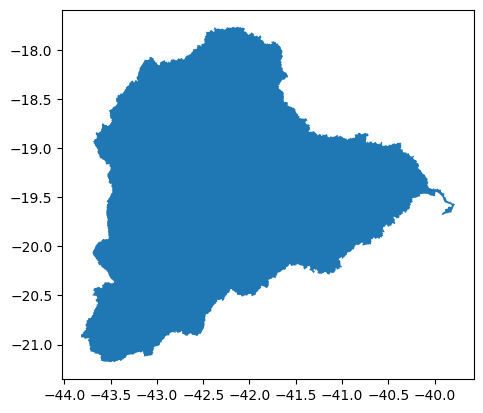

In [160]:
ax = doce.plot()

In [163]:
%%timeit
# open a geotiff file from disk
dataset = rio.open('../tmp/MERGE_CPTEC_20230101.tif')

# create a memory file and use it to create a memory dataset
with rio.MemoryFile() as memfile:
    with memfile.open(**dataset.profile) as memdset:

        # write the data to the newly created dataset
        memdset.write(dataset.read())
    
    # with the dataset in memory, add the basemap
    cx.add_basemap(ax, source=memfile)

139 ms ± 2.92 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


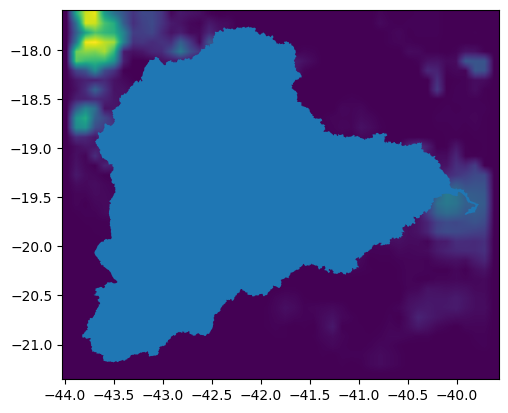

In [162]:
ax.figure

## Option 2 - Writing it to TempFile

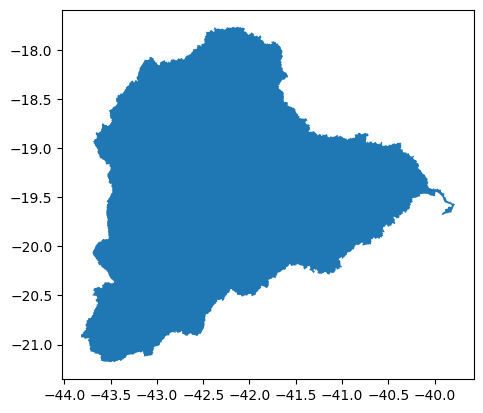

In [164]:
ax = doce.plot()

In [182]:
# %%timeit
# open a geotiff file from disk
dataset = rio.open('../tmp/MERGE_CPTEC_20230101.tif')

# get a tempfile
tmpfile = tempfile.NamedTemporaryFile(suffix='.tif')

# create a new geotiff file
with rio.open(tmpfile.name, 'w', **dataset.profile) as dst:
    # write the data from the input dataset to the output dataset
    dst.write(dataset.read())

dataset.close()

cx.add_basemap(ax, source=tmpfile.name)



142 ms ± 3.04 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [191]:
# note that the file does not exist in disk
print(Path(tmpfile.name).exists())
tmpfile.close()

False


## Option 3: Saving it to disk

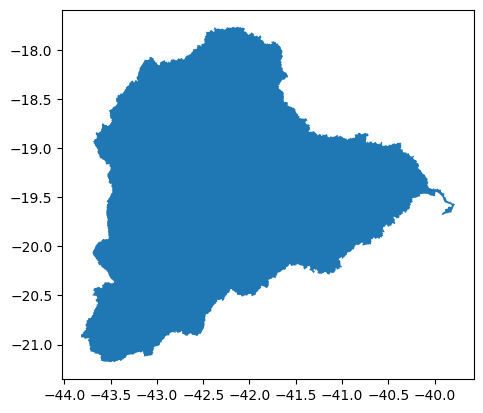

In [ ]:
ax = doce.plot()

In [194]:
%%timeit
# open a geotiff file from disk
dataset = rio.open('../tmp/MERGE_CPTEC_20230101.tif')

# get a tempfile
tmpfile = '../tmp/test.tif'

# create a new geotiff file
with rio.open(tmpfile, 'w', **dataset.profile) as dst:
    # write the data from the input dataset to the output dataset
    dst.write(dataset.read())

dataset.close()

cx.add_basemap(ax, source=tmpfile)

142 ms ± 5.14 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


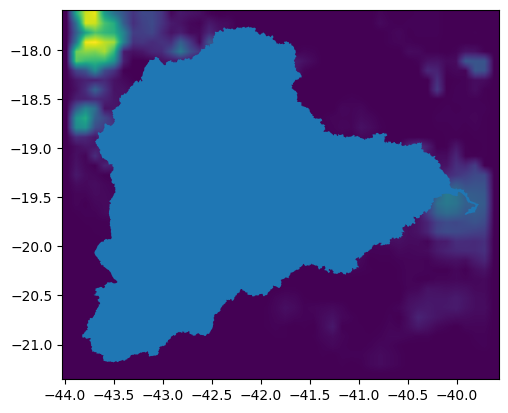

In [193]:
ax.figure

### Working with Xarray

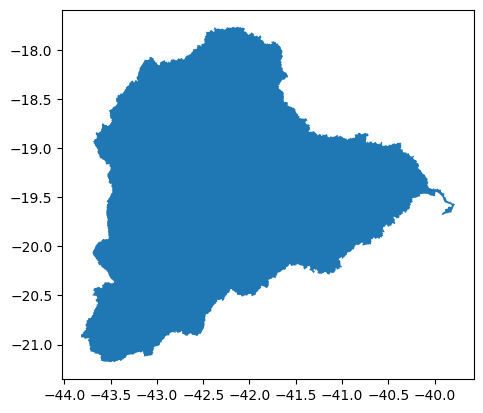

In [223]:
ax = doce.plot()

In [246]:
array = rain.to_array()
# create a memory file and use it to create a memory dataset
profile = dict(
    driver='GTiff', 
    width=array.rio.width, 
    height=array.rio.height, 
    count=array.rio.count, 
    dtype=array.dtype, 
    crs=array.rio.crs, 
    transform=array.rio.transform(),
    nodata=array.rio.nodata
)

with rio.MemoryFile() as memfile:
    with memfile.open(**profile) as memdset:

        # write the data to the newly created dataset
        memdset.write(array)
    
    # with the dataset in memory, add the basemap
    cx.add_basemap(ax, source=memfile)

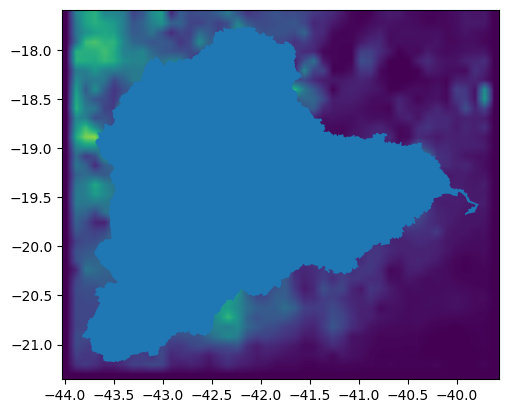

In [247]:
ax.figure

In [ ]:
# tmpfile.close()


# # create a memory file and use it to create a memory dataset
# with rio.MemoryFile() as memfile:
#     with memfile.open(**dataset.profile) as memdset:

#         # write the data to the newly created dataset
#         memdset.write(dataset.read())
    
#     # with the dataset in memory, add the basemap
#     cx.add_basemap(ax, source=memfile)

In [189]:
rain.rio.read

AttributeError: 'RasterDataset' object has no attribute 'read'

In [184]:
tmpfile.name

'/var/folders/j1/nkzpwxy956x_9m3tqxr331940000gn/T/tmpismf119n.tif'

In [185]:
!ls -l /var/folders/j1/nkzpwxy956x_9m3tqxr331940000gn/T/*.tif

-rw-------@ 1 cordmaur  staff  0 Mar 16 10:53 /var/folders/j1/nkzpwxy956x_9m3tqxr331940000gn/T/tmpgb82a_s3.tif
-rw-------@ 1 cordmaur  staff  0 Mar 16 11:00 /var/folders/j1/nkzpwxy956x_9m3tqxr331940000gn/T/tmpi4h8935l.tif


In [181]:
assert Path(tmpfile.name).exists()

AssertionError: 

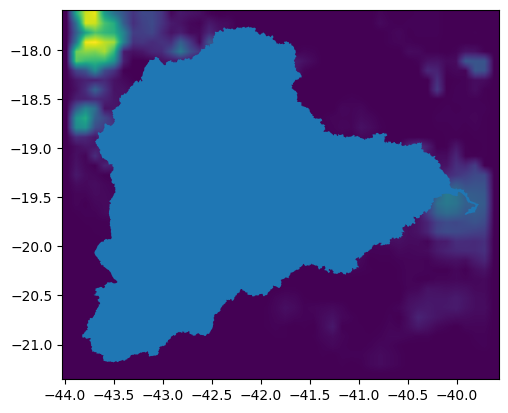

In [166]:
ax.figure

In [146]:
import rasterio as rio

# open a geotiff file from disk
dataset = rio.open('../tmp/MERGE_CPTEC_20230101.tif')

# create a memory file
memfile = rio.MemoryFile()

# create a memory dataset
memdset = memfile.open(**dataset.profile)
memdset.write(dataset.read())

# memdset.read()
memdset.read()

# # reset the memory file's cursor to the beginning
memfile.seek(0)

memdata = memfile.read()

print(memdata)

b'II*\x00\x08\x00\x00\x00\x10\x00\x00\x01\x03\x00\x01\x00\x00\x00\xe9\x03\x00\x00\x01\x01\x03\x00\x01\x00\x00\x00\x9c\x03\x00\x00\x02\x01\x03\x00\x01\x00\x00\x00 \x00\x00\x00\x03\x01\x03\x00\x01\x00\x00\x00\x08\x00\x00\x00\x06\x01\x03\x00\x01\x00\x00\x00\x01\x00\x00\x00\x11\x01\x04\x00\xce\x01\x00\x00\x06\x08\x00\x00\x15\x01\x03\x00\x01\x00\x00\x00\x01\x00\x00\x00\x16\x01\x03\x00\x01\x00\x00\x00\x02\x00\x00\x00\x17\x01\x04\x00\xce\x01\x00\x00\xce\x00\x00\x00\x1c\x01\x03\x00\x01\x00\x00\x00\x02\x00\x00\x00=\x01\x03\x00\x01\x00\x00\x00\x01\x00\x00\x00S\x01\x03\x00\x01\x00\x00\x00\x03\x00\x00\x00\xd8\x85\x0c\x00\x10\x00\x00\x00>\x0f\x00\x00\xaf\x87\x03\x00 \x00\x00\x00\xbe\x0f\x00\x00\xb0\x87\x0c\x00\x02\x00\x00\x00\xfe\x0f\x00\x00\xb1\x87\x02\x00\x08\x00\x00\x00\x0e\x10\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x

In [134]:
memfile.seek?

Docstring: <no docstring>
Type:      builtin_function_or_method

In [126]:
memfile.seek(0)
memfile.read()

b'II*\x00\x08\x00\x00\x00\x10\x00\x00\x01\x03\x00\x01\x00\x00\x00\xe9\x03\x00\x00\x01\x01\x03\x00\x01\x00\x00\x00\x9c\x03\x00\x00\x02\x01\x03\x00\x01\x00\x00\x00 \x00\x00\x00\x03\x01\x03\x00\x01\x00\x00\x00\x08\x00\x00\x00\x06\x01\x03\x00\x01\x00\x00\x00\x01\x00\x00\x00\x11\x01\x04\x00\xce\x01\x00\x00\x06\x08\x00\x00\x15\x01\x03\x00\x01\x00\x00\x00\x01\x00\x00\x00\x16\x01\x03\x00\x01\x00\x00\x00\x02\x00\x00\x00\x17\x01\x04\x00\xce\x01\x00\x00\xce\x00\x00\x00\x1c\x01\x03\x00\x01\x00\x00\x00\x02\x00\x00\x00=\x01\x03\x00\x01\x00\x00\x00\x01\x00\x00\x00S\x01\x03\x00\x01\x00\x00\x00\x03\x00\x00\x00\xd8\x85\x0c\x00\x10\x00\x00\x00>\x0f\x00\x00\xaf\x87\x03\x00 \x00\x00\x00\xbe\x0f\x00\x00\xb0\x87\x0c\x00\x02\x00\x00\x00\xfe\x0f\x00\x00\xb1\x87\x02\x00\x08\x00\x00\x00\x0e\x10\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x

In [125]:
memfile.read()

b''

In [127]:
dset2 = rio.open(fp=memfile)

RasterioIOError: '/vsipythonfilelike/6401a6ef-7c49-47b3-b341-75061e96b73a/6401a6ef-7c49-47b3-b341-75061e96b73a' not recognized as a supported file format.

In [29]:
cx.add_basemap(source=memfile, ax=ax)

RasterioIOError: '/vsipythonfilelike/fee30ddc-aa04-4dc9-89e7-61590c71d577/fee30ddc-aa04-4dc9-89e7-61590c71d577' not recognized as a supported file format.

In [50]:
type(memfile)

rasterio.io.MemoryFile

In [52]:
2

2

In [53]:
memfile.close()

In [39]:
rio.open(memfile)

RasterioIOError: '/vsipythonfilelike/3f4881df-57f5-4fcc-a1e1-e8d45391ecd4/3f4881df-57f5-4fcc-a1e1-e8d45391ecd4' not recognized as a supported file format.

In [30]:
type(memfile), type(memdset), type(dataset)

(rasterio.io.MemoryFile, rasterio.io.DatasetWriter, rasterio.io.DatasetReader)

In [34]:
cx.add_basemap(source=)

924

In [36]:
rain.rio.height

924

In [29]:
rio.open(memfile)

RasterioIOError: '/vsipythonfilelike/43afb194-8ee4-4ba9-a742-517ae4b1ebe2/43afb194-8ee4-4ba9-a742-517ae4b1ebe2' not recognized as a supported file format.

In [26]:
rio.open(memfile)

RasterioIOError: '/vsipythonfilelike/41846160-ea9c-4080-9c80-29c4ebcb98d4/41846160-ea9c-4080-9c80-29c4ebcb98d4' not recognized as a supported file format.

In [25]:
cx.add_basemap(ax, source=memdset)

IndexError: band index 1024 out of range (not in (1,))

Exception ignored in: 'rasterio._filepath.filepath_read'
Traceback (most recent call last):
  File "rasterio/_io.pyx", line 496, in rasterio._io.DatasetReaderBase.read
IndexError: band index 1024 out of range (not in (1,))


AttributeError: 'DatasetWriter' object has no attribute 'seek'

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "rasterio/_filepath.pyx", line 141, in rasterio._filepath.filepath_seek
AttributeError: 'DatasetWriter' object has no attribute 'seek'


SystemError: <built-in method replace of str object at 0x17d3f9b70> returned a result with an error set

In [22]:
with rio.MemoryFile() as mem:
    with mem.open(**dataset.profile) as dst:
        dst.write(dataset.read())

In [23]:
cx.add_basemap(ax, source=mem)

: 

: 

In [ ]:
with MemoryFile() as memfile:
    memfile.write

In [161]:
MemoryFile?

Init signature: MemoryFile(file_or_bytes=None, dirname=None, filename=None, ext='.tif')
Docstring:     
A BytesIO-like object, backed by an in-memory file.

This allows formatted files to be read and written without I/O.

A MemoryFile created with initial bytes becomes immutable. A
MemoryFile created without initial bytes may be written to using
either file-like or dataset interfaces.

Examples
--------

A GeoTIFF can be loaded in memory and accessed using the GeoTIFF
format driver

>>> with open('tests/data/RGB.byte.tif', 'rb') as f, MemoryFile(f) as memfile:
...     with memfile.open() as src:
...         pprint.pprint(src.profile)
...
{'count': 3,
 'crs': CRS({'init': 'epsg:32618'}),
 'driver': 'GTiff',
 'dtype': 'uint8',
 'height': 718,
 'interleave': 'pixel',
 'nodata': 0.0,
 'tiled': False,
 'transform': Affine(300.0379266750948, 0.0, 101985.0,
       0.0, -300.041782729805, 2826915.0),
 'width': 791}
Init docstring:
Create a new file in memory

Parameters
----------
file_or_byte

In [160]:
from rasterio import MemoryFile

In [158]:
cx.add_basemap(ax, source=dataset)

IndexError: band index 1024 out of range (not in (1,))

Exception ignored in: 'rasterio._filepath.filepath_read'
Traceback (most recent call last):
  File "rasterio/_io.pyx", line 496, in rasterio._io.DatasetReaderBase.read
IndexError: band index 1024 out of range (not in (1,))


AttributeError: 'DatasetReader' object has no attribute 'seek'

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "rasterio/_filepath.pyx", line 141, in rasterio._filepath.filepath_seek
AttributeError: 'DatasetReader' object has no attribute 'seek'


SystemError: <built-in method replace of str object at 0x12f9c6630> returned a result with an error set

In [153]:
rio.DatasetReader?

Docstring:      An unbuffered data and metadata reader
Init docstring:
Construct a new dataset

Parameters
----------
path : rasterio.path.Path or str
    Path of the local or remote dataset.
driver : str or list of str
    A single driver name or a list of driver names to consider when
    opening the dataset.
sharing : bool, optional
    Whether to share underlying GDAL dataset handles (default: False).
kwargs : dict
    GDAL dataset opening options.

Returns
-------
dataset
File:           ~/miniconda3/envs/geopandas38/lib/python3.8/site-packages/rasterio/io.py
Type:           type
Subclasses:     

In [132]:
tempfile.name

'/var/folders/j1/nkzpwxy956x_9m3tqxr331940000gn/T/tmpi4h8935l.tif'

In [ ]:
tempfile.NamedTemporaryFile()

In [127]:
p = Path(tempdir)

In [128]:
p.exists()

True

In [ ]:
temp.

In [125]:
rain.rio.to_raster(temp)

TypeError: expected str, bytes or os.PathLike object, not _TemporaryFileWrapper

In [104]:
rain.to_array().values

array([[[ 2.25  ,  3.375 ,  3.5   , ...,  9.5   ,  8.25  ,  8.875 ],
        [ 4.25  ,  4.5   ,  5.125 , ...,  8.875 ,  7.375 ,  7.625 ],
        [ 5.5   ,  6.125 ,  5.875 , ...,  7.    ,  6.625 ,  7.125 ],
        ...,
        [17.125 , 17.5625, 19.375 , ...,  2.5   ,  2.    ,  1.625 ],
        [15.8125, 17.375 , 19.1875, ...,  1.875 ,  1.75  ,  1.5   ],
        [18.5   , 17.1875, 17.5625, ...,  2.    ,  1.5   ,  1.625 ]]],
      dtype=float32)

In [105]:
import io

In [106]:
stream = io.BytesIO()

In [107]:
rain.rio.to_raster(stream)

TypeError: expected str, bytes or os.PathLike object, not _io.BytesIO

In [109]:
import rioxarray as xrio

In [118]:
type(data.rio)

rioxarray.raster_array.RasterArray

In [111]:
files

[PosixPath('../tmp/MERGE_CPTEC_20230101.tif'),
 PosixPath('../tmp/MERGE_CPTEC_20230102.tif'),
 PosixPath('../tmp/MERGE_CPTEC_20230103.tif'),
 PosixPath('../tmp/MERGE_CPTEC_20230104.tif'),
 PosixPath('../tmp/MERGE_CPTEC_20230105.tif')]

In [119]:
data = xrio.open_rasterio(files[0])

In [121]:
data.to

Object `data.rio.BytesIO` not found.


In [108]:
rain.rio

In [8]:
file = downloader.download_file('2023-03-05', local_folder='../tmp', file_type=FileType.GEOTIFF)
assert file.exists()

file ../tmp/MERGE_CPTEC_20230305.grib2 already exists.


In [10]:
files = downloader.download_range(
    start_date='20230101', 
    end_date='20230105', 
    local_folder='../tmp',
    file_type=FileType.GEOTIFF
)

file ../tmp/MERGE_CPTEC_20230101.grib2 already exists.
file ../tmp/MERGE_CPTEC_20230102.grib2 already exists.
file ../tmp/MERGE_CPTEC_20230103.grib2 already exists.
file ../tmp/MERGE_CPTEC_20230104.grib2 already exists.
file ../tmp/MERGE_CPTEC_20230105.grib2 already exists.


In [46]:
cube = INPEDownloader.create_cube(files, squeeze_dims='band')
cube

<xarray.Dataset>
Dimensions:      (x: 1001, y: 924, time: 5)
Coordinates:
    band         int64 1
  * x            (x) float64 -120.1 -120.0 -119.9 ... -20.25 -20.15 -20.05
  * y            (y) float64 -60.05 -59.95 -59.85 -59.75 ... 32.05 32.15 32.25
    spatial_ref  int64 0
  * time         (time) int64 0 1 2 3 4
Data variables:
    band_data    (time, y, x) float32 2.25 1.75 1.75 3.0 ... 0.0 0.0 0.0 0.0

In [64]:
cube

<xarray.Dataset>
Dimensions:      (x: 1001, y: 924, time: 5)
Coordinates:
    band         int64 1
  * x            (x) float64 -120.1 -120.0 -119.9 ... -20.25 -20.15 -20.05
  * y            (y) float64 -60.05 -59.95 -59.85 -59.75 ... 32.05 32.15 32.25
    spatial_ref  int64 0
  * time         (time) int64 0 1 2 3 4
Data variables:
    band_data    (time, y, x) float32 2.25 1.75 1.75 3.0 ... 0.0 0.0 0.0 0.0

In [ ]:
cube.su

In [52]:
INPE.parse_MERGE_filename(files[0])

{'date': datetime.datetime(2023, 1, 1, 0, 0)}

In [57]:
time_cube = INPEDownloader.create_cube(files, name_parser=INPE.parse_MERGE_filename, dim_key='date', squeeze_dims='band')

In [58]:
time_cube

<xarray.Dataset>
Dimensions:      (x: 1001, y: 924, date: 5)
Coordinates:
    band         int64 1
  * x            (x) float64 -120.1 -120.0 -119.9 ... -20.25 -20.15 -20.05
  * y            (y) float64 -60.05 -59.95 -59.85 -59.75 ... 32.05 32.15 32.25
    spatial_ref  int64 0
  * date         (date) datetime64[ns] 2023-01-01 2023-01-02 ... 2023-01-05
Data variables:
    band_data    (date, y, x) float32 2.25 1.75 1.75 3.0 ... 0.0 0.0 0.0 0.0

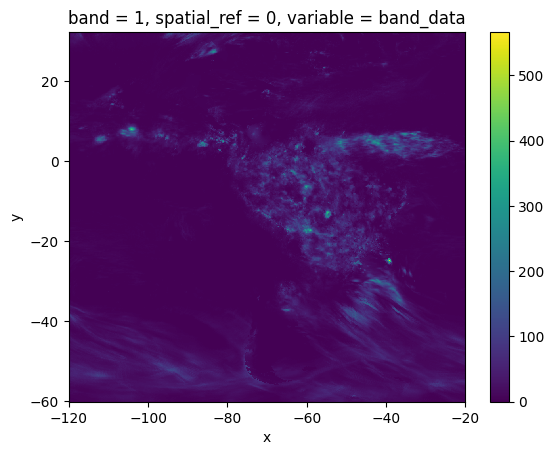

In [63]:
time_cube.sum(dim='date').to_array().plot()

In [11]:
import xarray as xr

In [30]:
data_arrays = [xr.open_dataset(file) for file in files]

# for i, array in enumerate(data_arrays):
#     array.assign_coords({'time': i})

In [32]:
cube

<xarray.Dataset>
Dimensions:      (band: 1, x: 1001, y: 924, time: 5)
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 -120.1 -120.0 -119.9 ... -20.25 -20.15 -20.05
  * y            (y) float64 -60.05 -59.95 -59.85 -59.75 ... 32.05 32.15 32.25
    spatial_ref  int64 0
Dimensions without coordinates: time
Data variables:
    band_data    (time, band, y, x) float32 2.25 1.75 1.75 3.0 ... 0.0 0.0 0.0

In [13]:
coords = [f'File {i}' for i in range(len(files))]
coords

['File 0', 'File 1', 'File 2', 'File 3', 'File 4']

In [31]:
cube = xr.concat(data_arrays, dim='time')

In [29]:
cube.assign_coords(coords={'time': coords})

<xarray.Dataset>
Dimensions:      (band: 1, x: 1001, y: 924, time: 5)
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 -120.1 -120.0 -119.9 ... -20.25 -20.15 -20.05
  * y            (y) float64 -60.05 -59.95 -59.85 -59.75 ... 32.05 32.15 32.25
    spatial_ref  int64 0
  * time         (time) <U6 'File 0' 'File 1' 'File 2' 'File 3' 'File 4'
Data variables:
    band_data    (time, band, y, x) float32 2.25 1.75 1.75 3.0 ... 0.0 0.0 0.0

In [17]:
xr.concat?

Signature:
xr.concat(
    objs,
    dim,
    data_vars='all',
    coords='different',
    compat: 'CompatOptions' = 'equals',
    positions=None,
    fill_value=<NA>,
    join: 'JoinOptions' = 'outer',
    combine_attrs: 'CombineAttrsOptions' = 'override',
)
Docstring:
Concatenate xarray objects along a new or existing dimension.

Parameters
----------
objs : sequence of Dataset and DataArray
    xarray objects to concatenate together. Each object is expected to
    consist of variables and coordinates with matching shapes except for
    along the concatenated dimension.
dim : Hashable or DataArray or pandas.Index
    Name of the dimension to concatenate along. This can either be a new
    dimension name, in which case it is added along axis=0, or an existing
    dimension name, in which case the location of the dimension is
    unchanged. If dimension is provided as a DataArray or Index, its name
    is used as the dimension to concatenate along and the values are added
    as a coord

In [17]:
cube.time

<xarray.DataArray 'time' (time: 5)>
array([0, 1, 2, 3, 4])
Coordinates:
    spatial_ref  int64 0
Dimensions without coordinates: time

In [35]:
array = data_arrays[0]

In [36]:
from datetime import datetime

In [37]:
datetime.now()

datetime.datetime(2023, 3, 14, 16, 24, 2, 738128)

In [38]:
array

<xarray.Dataset>
Dimensions:      (band: 1, x: 1001, y: 924)
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 -120.1 -120.0 -119.9 ... -20.25 -20.15 -20.05
  * y            (y) float64 -60.05 -59.95 -59.85 -59.75 ... 32.05 32.15 32.25
    spatial_ref  int64 ...
Data variables:
    band_data    (band, y, x) float32 ...

In [39]:
array = array.assign_coords({'time': datetime.now()})

In [43]:
array.time

<xarray.DataArray 'time' ()>
array('2023-03-14T16:24:04.965328000', dtype='datetime64[ns]')
Coordinates:
    spatial_ref  int64 ...
    time         datetime64[ns] 2023-03-14T16:24:04.965328

In [45]:
array = array.expand_dims(time=1)

In [46]:
array.squeeze('band')


<xarray.Dataset>
Dimensions:      (x: 1001, y: 924, time: 1)
Coordinates:
    band         int64 1
  * x            (x) float64 -120.1 -120.0 -119.9 ... -20.25 -20.15 -20.05
  * y            (y) float64 -60.05 -59.95 -59.85 -59.75 ... 32.05 32.15 32.25
    spatial_ref  int64 ...
  * time         (time) datetime64[ns] 2023-03-14T16:24:04.965328
Data variables:
    band_data    (time, y, x) float32 2.25 1.75 1.75 3.0 ... 1.75 1.375 1.375